# Progress Task 1: Prediction of wine quality

# Introduction

This progress task has the aim to predict the quality of wine based on its physicochemical properties. The dataset used in this task is the [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality) from the UCI Machine Learning Repository. Credits to *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

The objective of this task is to select an apropiate regression and classification model and compare them.

## Prepare environmental variables

Download the dataset and import the necessary packages.

In [11]:
%pip install ucimlrepo seaborn matplotlib scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
from ucimlrepo import fetch_ucirepo 
 
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
 
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

df_wine = pd.concat([X,y], axis=1)
 
# metadata 
print(wine_quality.metadata) 

# get variable information 
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

## Exploratory Data Analysis (EDA)

In this section, a brief exploratory data analysis (EDA) will be performed on the dataset, prior to correctly pre-process it and capture the most relevant features for model training.

### Describing the dataset

In [4]:
# Check the number of instances and the number of features
print ("Shape of data:", X.shape , y.shape)

Shape of data: (6497, 11) (6497, 1)


In [5]:
# Print the first rows of the features
print("=================== Feature's First Rows ===================\n", X.head(3), "\n")

# Print the first rows of the target
print("=================== Target's First Rows ===================\n", y.head(3), "\n")

=================== Feature's First Rows ===================
    fixed_acidity  volatile_acidity  citric_acid  ...    pH  sulphates  alcohol
0            7.4              0.70         0.00  ...  3.51       0.56      9.4
1            7.8              0.88         0.00  ...  3.20       0.68      9.8
2            7.8              0.76         0.04  ...  3.26       0.65      9.8

[3 rows x 11 columns] 

=================== Target's First Rows ===================
    quality
0        5
1        5
2        5 



In [6]:
# Check for missing values
print("=================== Null value count ===================\n",df_wine.isnull().sum(), "\n")

=================== Null value count ===================
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64 



In [27]:
df_wine.describe(percentiles=[])

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
50%         7.000000          0.290000     0.310000        3.000000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
50%       0.047000            29.000000            118.000000     0.994890   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
50%       3.210000     0.510000    10.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

Now that we have taken a look into the dataset, here's a summary:

The dataset consists of 11 continuous features, none of them with missing values. The features are: 

* `fixed_acidity`: with values ranging from 4.6 to 15.9.
* `volatile_acidity`: with values ranging from 0.12 to 1.58.
* `citric_acid`: with values ranging from 0 to 1.66.
* `residual_sugar`: with values ranging from 0.6 to 65.8.
* `chlorides`: with values ranging from 0.009 to 0.611.
* `free_sulfur_dioxide`: with values ranging from 1 to 289.
* `total_sulfur_dioxide`: with values ranging from 6 to 440.
* `density`: with values ranging from 0.99 to 1.003.
* `pH`: with values ranging from 2.74 to 4.01.
* `sulphates`: with values ranging from 0.33 to 2.
* `alcohol`: with values ranging from 8.4 to 14.9.

The target variable is:
* `quality`: is an integer variable, from 0 to 10 but in this dataset it ranges from 3 to 9.

Now that the statistical summary of the dataset has been obtained, a pairplot will be created to visualize the relationships between the features and the target variable.

### Descriptive statistics

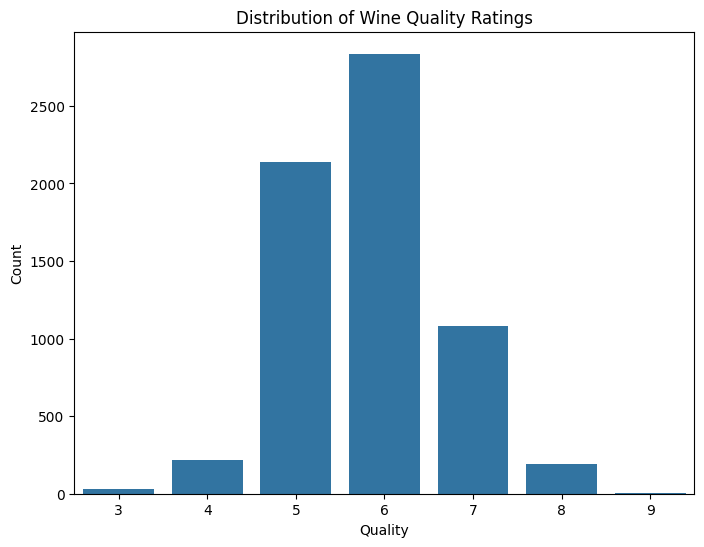

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df_wine)
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

As shown in the plot, the target variable `quality` is not a balanced set. The majority of the wines have a quality of 5 or 6, with a few wines having a quality of 3 or 9. 

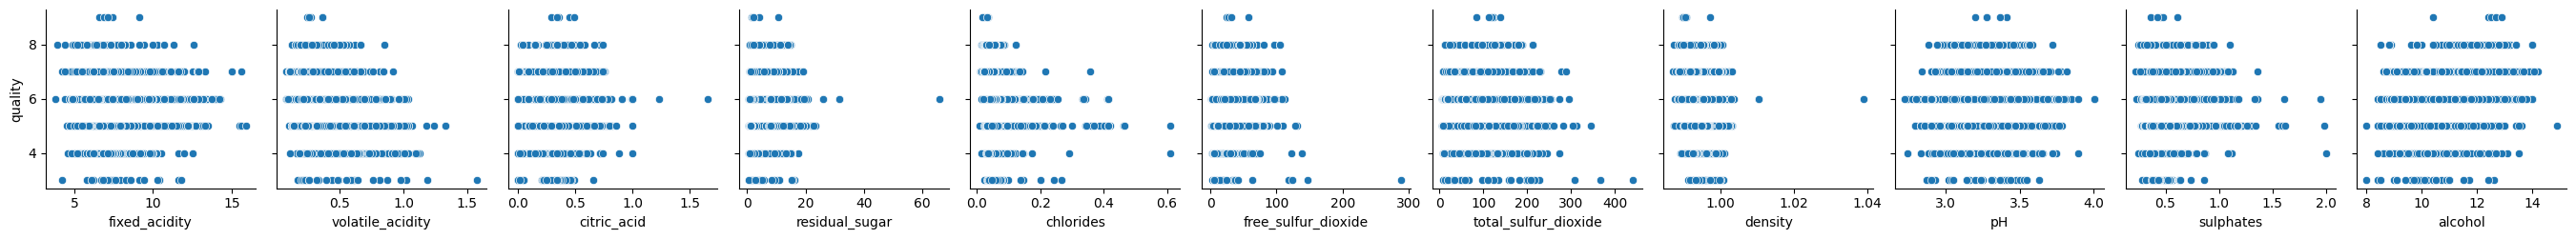

In [12]:
sns.pairplot(df_wine, y_vars='quality',x_vars=df_wine.columns[:-1])
plt.show()

From the pairplot, a strange data distribution can be observed. All the instances seem to be grouped by a certain value of the variable `quality`. The reason for this is that the target variable is **discrete**, so **it is treated as a categorical variable**.

Given that no direct relation with the target can be inferred from the pairplot, the next step is to create pairplots between every pair of features. Then, the dependencies between the features will be analyzed.

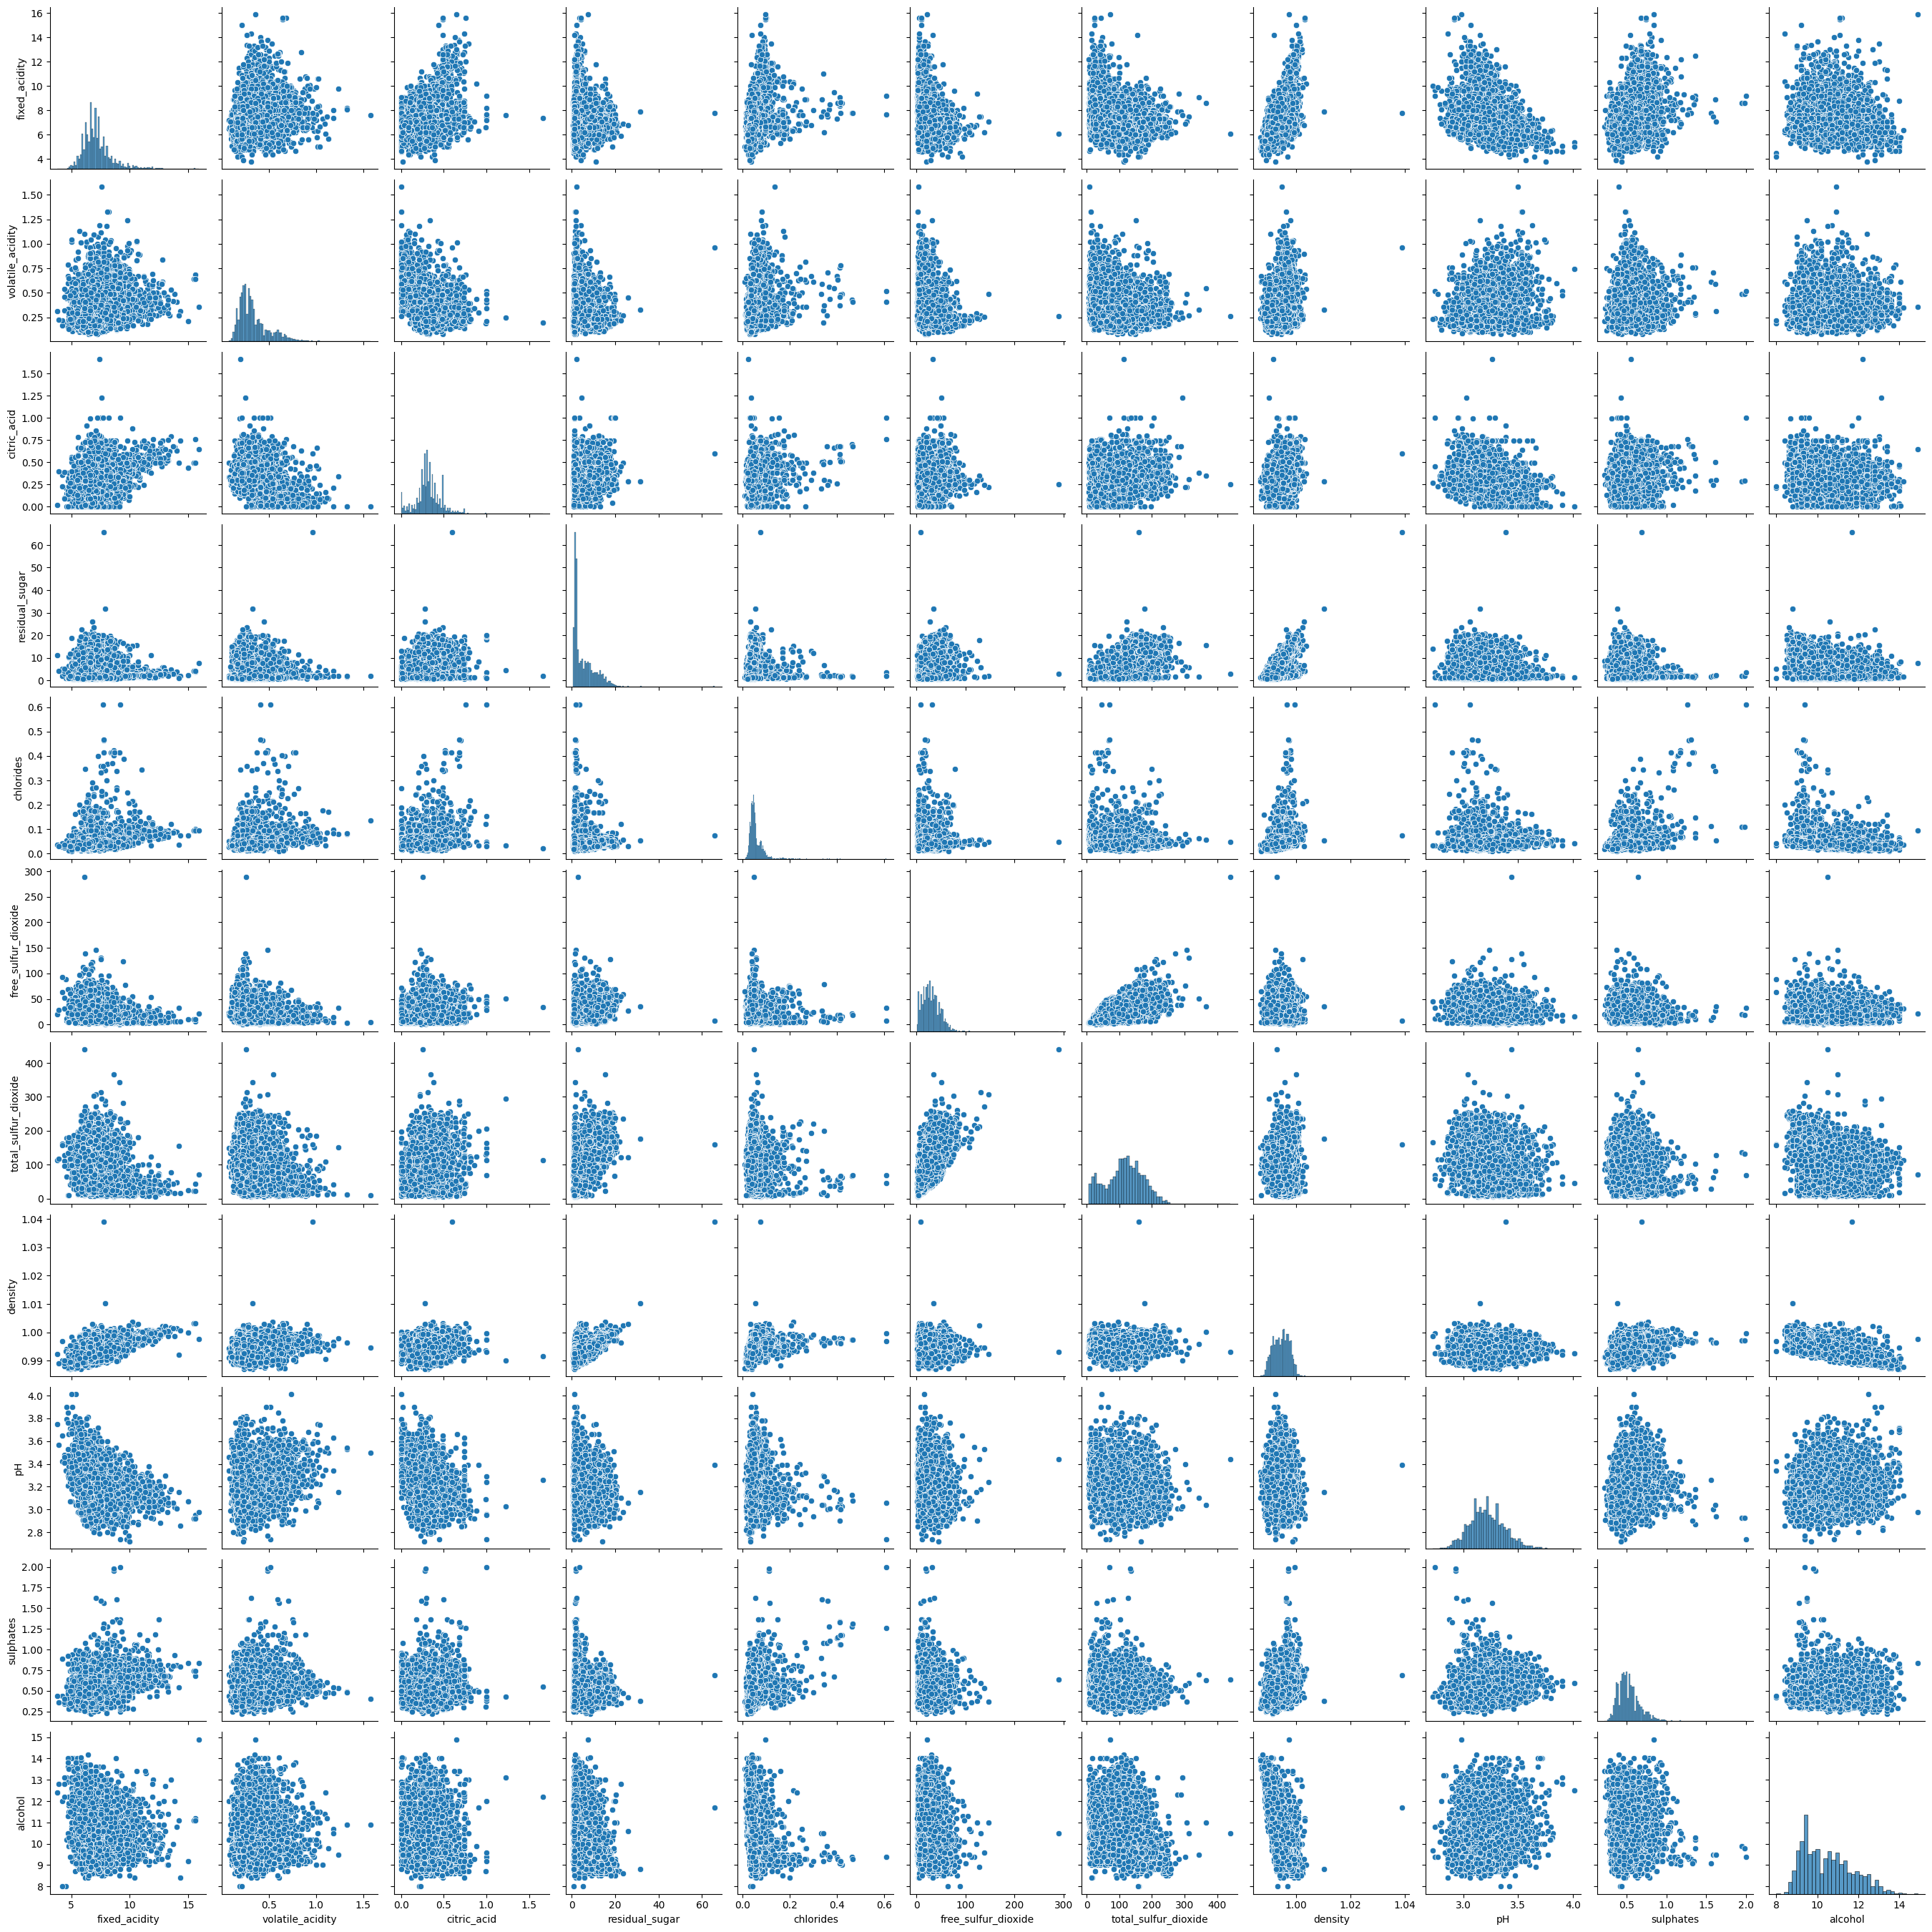

In [ ]:
sns.pairplot(data = X)
plt.show()

From the pairplot there are some interesting observations: 

- Fixed acidity and density seem to have a linear relationship. 
- Density seems to have a horizontal line pattern with other features, that could represent a constant value.

From there, valueable information cannot be extracted, so it is necessary to continue analyzing the dataset. 

<Axes: >

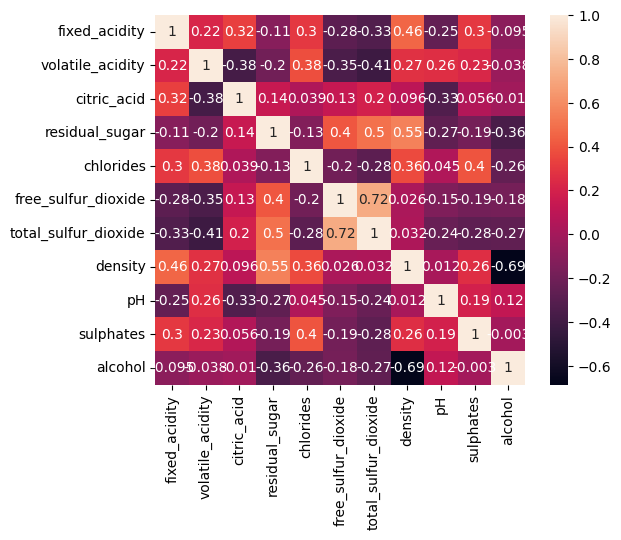

In [14]:
# Correlation matrix
corrmat = X.corr()
sns.heatmap(corrmat, square = True, annot=True)

Out from the plot, the strongest correlation can be observed between the attributes **`free_sulfur_dioxide`** and **`total_sulfur_dioxide`** (0.72). The reason for this is total sulfur dioxide includes the free sulfur dioxide, so the variable free sulfur will be removed from the dataset, as both variables represent almost the same information and this will reduce redundancy.

The second strongest correlation is between **`density`** and **`alcohol`** (-0.69). This correlation is negative, due to the fact that an increase in the alcohol graduation in wine leads to a loss of water quantity. Therefore, given that alcohol is less dense than water, the density of the wine decreases.

maybe test to remove density as it might be a constant value?

In [37]:
df_wine.drop(columns=['free_sulfur_dioxide'], inplace=True)
X.drop(columns=['free_sulfur_dioxide'], inplace=True)

/tmp/ipykernel_23712/1948943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['free_sulfur_dioxide'], inplace=True)


## Performance evaluation of regression models

We will put here the different model evaluations

### Simple Linear Regression

Simple linear regression assumes the dependency of Y on X (or $X_1$, $X_2$, ... , $X_n$) is linear. In simple linear regression, we have a single predictor X. Mathematically, we can write this linear relationship as: $Y = \beta_0 + \beta_1X + \epsilon$.

Let's plot again the pairplot with all the features and the target variable.

In [ ]:
sns.pairplot(df_wine, y_vars='quality',x_vars=df_wine.columns[:-1])
plt.show()

As we can see, a line cannot be drawn to represent the relationship between the features and the target variable. This is because the target variable is discrete. However, let's try to fit a simple linear regression model for each feature.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
plt.figure(figsize=(20, 15))
y = df_wine['quality']
for i, feature in enumerate(df_wine.columns[:-1]):
    plt.subplot(4, 3, i + 1)
    linear = LinearRegression()
    X = df_wine[[feature]]  # Reshape to 2D array
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    linear.fit(X_train, y_train)
    y_pred = linear.predict(X_test)
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, color='red')
    plt.title(f"{feature} {r2_score(y_test, y_pred)}")
plt.tight_layout()
plt.show()

The results shows, what we expected. That a simple linear regression model cannot be used to predict the quality of the wine that is a discrete variable.

The highest $R^2$ score is 0.18, for the feature alcohol, which is very low. The rest are close to 0.

**Conclusion**: Can't use simple linear regression.

### Multilinear Regression

#### Multilinear Regression - Ridge criterion

The following block of code will make the preparations for a multilinear regression model using the Ridge criterion. The model will be trained and evaluated using the dataset. Firstly, the train-test division will be performed, then the model will be trained and evaluated following a cross validation factor of 5.

In [ ]:
# Make the Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train data shape: ", X_train.shape, y_train.shape)

print("Test data shape: ", X_test.shape, y_test.shape)

# Create the Ridge Multilinear Regression model. We will

ridge_regressor = RidgeCV(cv=5)

# Fit the model
ridge_regressor.fit(X_train, y_train)

Train data shape:  (5197, 11) (5197, 1)
Test data shape:  (1300, 11) (1300, 1)


RidgeCV(cv=5)

The regression model has been successfully trained. Now, some metrics will be extracted from it:
As we can see, a line cannot be drawn to represent the relationship between the features and the target variable. This is because the target variable is discrete. However, let's try to fit a simple linear regression model for each feature.

In [6]:
# Best lambda (alpha) selected by cross-validation
best_lambda = ridge_regressor.alpha_
print(f"Best lambda selected by RidgeCV: {best_lambda}")

Best lambda selected by RidgeCV: 0.1


Finally, the model is tested on the test set and is evaluated by the following metrics:

- Mean Squares Error (MAE)
- R² score

In [ ]:

# Predict on the training and testing sets
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

# Calculate both Mean Squared Error and R2 Score
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
test_mse_ridge = mean_squared_error(y_test, y_test_pred)

train_r2_ridge = r2_score(y_train, y_train_pred)
test_r2_ridge = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse_ridge}")
print(f"Test MSE: {test_mse_ridge}")
print(f"Train R2: {train_r2_ridge}")
print(f"Test R2: {test_r2_ridge}")



Train MSE: 0.5403392718721161
Test MSE: 0.5469726123572165
Train R2: 0.29676625444532223
Test R2: 0.25939337537680274


**Conclusion:** The model has not a good performance, the MSE is high and the R² score is low. This means that the model is not able to accurately predict the quality of the wine based on the physicochemical properties. This may be due to the fact that the target variable is discrete and not continuous, so a classification approach may be more suitable for this problem.

#### Multilienar Regression - Lasso criterion

### Polynomial Regression

### Decision Tree Regression

### Random Forest Regressor

### Generative Additive Models (GAMs)

### Final decision

Here we mention the best model.

## Performance evaluation of classification models

We will put here the different model evaluations

### Naïve Bayes

Naïve Bayes is a classiffication algorithm based on Bayes' theorem. It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Its aim is to predict that the n-dimensional feature vector $X=(x_1,x_2,...,x_n)$ belongs to class $Y_i$, encountered within a set of classes $C=(Y_1,Y_2,...,Y_n)$ that verifies this condition:

$\argmax(P(Y_i|X))$.

This algorithm would only work in the case of categorical features, in algorithms like **Multinomial Naïve Bayes**.

In order to estimate the class-conditional probabilities for continuous features, there are well-known techniques which assume that the likelihood of the features follows a certain probability distribution. **Gaussian Naïve Bayes**, for example, assumes a Gaussian distribution.

#### Gaussian Naïve Bayes

Gaussian Naïve Bayes assumes Gaussian distribution for the likelihood of numeric continuous features:

$g(x_i,μ,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}e^\frac{(x_i-μ)^2}{2\sigma^2}$

so that the likelihood of the features is calculated as:

$P(X_i = x_i|Y_i = y_i)=g(x_i,μ_{Y_i},\sigma_{Y_i})$

This algorithm is suitable for the dataset, as it contains a discrete target feature. The main issue will be to perform discretization on the target variable, which is still numeric.

In [65]:
from sklearn.preprocessing import KBinsDiscretizer

bins = (2, 5.5, 9)
labels= ["poor quality", "nice quality"]

# Perform discretization on the continuous features
y_discretized = pd.cut(df_wine['quality'], bins=bins, labels=labels)

# Show that the target has been discretized
y_discretized

0       poor quality
1       poor quality
2       poor quality
3       nice quality
4       poor quality
            ...     
6492    nice quality
6493    poor quality
6494    nice quality
6495    nice quality
6496    nice quality
Name: quality, Length: 6497, dtype: category
Categories (2, object): ['poor quality' < 'nice quality']

The target variable is now categorical, so the Gaussian Naïve Bayes algorithm can be used. Its most important assumption is the normality of the data, this means, that if the features used are normally distributed, the algorithm will perform better. This normality can be checked by plotting the histogram of the features, as seen below:

fixed_acidity              1.680740
volatile_acidity           0.027105
citric_acid                0.021117
residual_sugar            22.636696
chlorides                  0.001227
free_sulfur_dioxide      315.041192
total_sulfur_dioxide    3194.720039
density                    0.000009
pH                         0.025853
sulphates                  0.022143
alcohol                    1.422561
dtype: float64


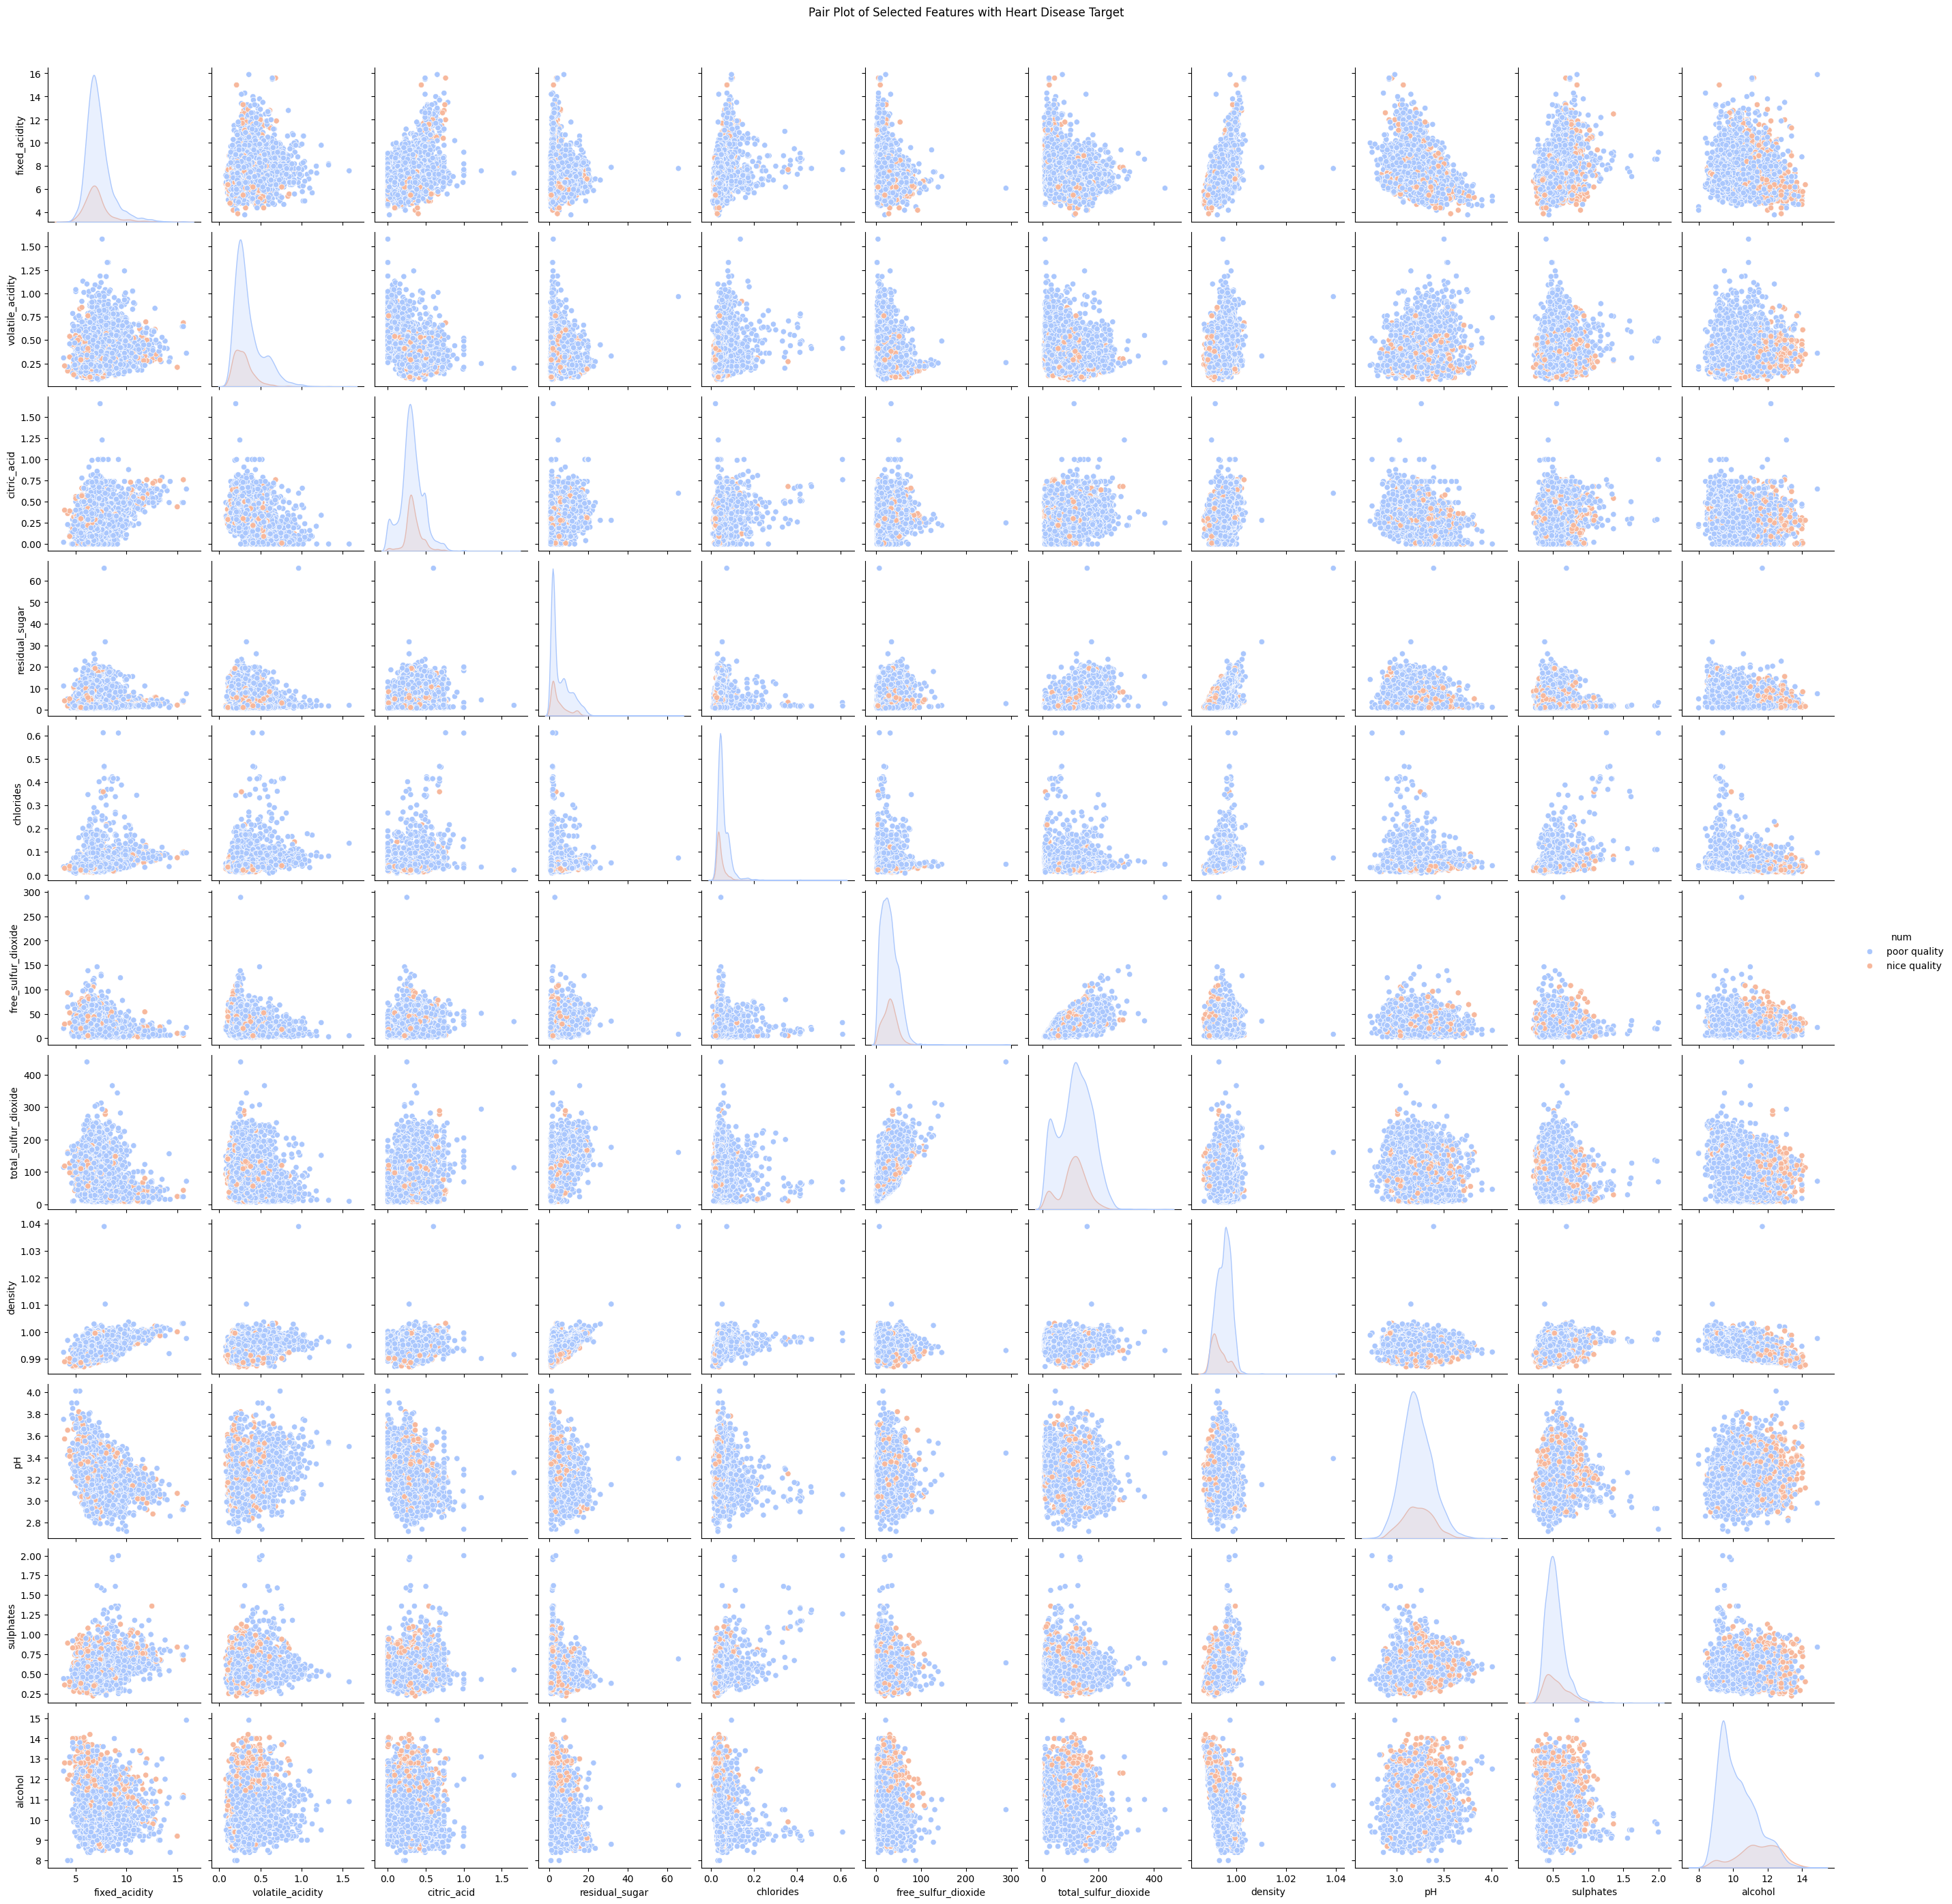

In [31]:
print(X.var())
df_dummy = pd.DataFrame(X, columns=X.columns)
df_dummy['num'] = y
# Create a pair plot with the 'target' variable as the hue
sns.pairplot(df_dummy, hue='num', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features with Heart Disease Target', y=1.02)
plt.show()

We can see that there is a subset of features whose relation follows a probability distribution close to normality. Those are `fixed_acidity`,`citric_acid`, `ph` and `sulphates`. We will use this for the Gaussian Naïve Bayes algorithm.

In [66]:
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes model and select features with normality
gaussian_nb_classifier = GaussianNB()
selected_features = ['fixed_acidity', 'residual_sugar', 'total_sulfur_dioxide', 'alcohol']
X_selected = X[selected_features]



# Separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_discretized, test_size=0.2, random_state=42)

gaussian_nb_classifier.fit(X_train, y_train)

y_pred = gaussian_nb_classifier.predict(X_test)

With the model trained and tested, some metrics are extracted:

In [68]:
from sklearn import metrics

# Calculate Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

# Calculate Precision for nice quality wine
precision = metrics.precision_score(y_test, y_pred, pos_label='nice quality')
print(f"Precision of the model for nice quality wine: {precision}")

# Calculate Recall for poor quality wine
precision = metrics.precision_score(y_test, y_pred, pos_label='poor quality')
print(f"Precision of the model for poor quality wine: {precision}")

# Calculate Recall for nice quality wine
recall = metrics.recall_score(y_test, y_pred, pos_label='nice quality')
print(f"Recall Score of the model for nice quality wine: {recall}")

# Calculate Recall for poor quality wine
recall = metrics.recall_score(y_test, y_pred, pos_label='poor quality')
print(f"Recall Score of the model for poor quality wine: {recall}")

# Calculate F1 Score for nice quality wine
f1_score = metrics.f1_score(y_test, y_pred, pos_label='nice quality')
print(f"F-1 Score for nice quality wine: {f1_score}")

# Calculate F1 Score for poor quality wine
f1_score = metrics.f1_score(y_test, y_pred, pos_label='poor quality')
print(f"F-1 Score for poor quality wine: {f1_score}")


Accuracy of the model: 0.683076923076923
Precision of the model for nice quality wine: 0.7909454061251664
Precision of the model for poor quality wine: 0.5355191256830601
Recall Score of the model for nice quality wine: 0.6996466431095406
Recall Score of the model for poor quality wine: 0.6518847006651884
F-1 Score for nice quality wine: 0.7425
F-1 Score for poor quality wine: 0.588


Other metrics can be extracted from this, such as a summary or a confusion matrix:

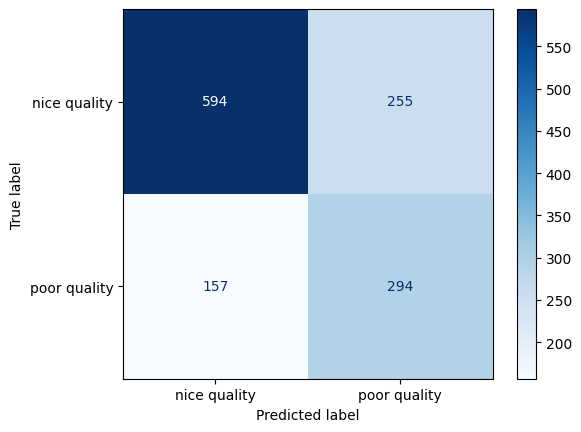

              precision    recall  f1-score   support

nice quality       0.79      0.70      0.74       849
poor quality       0.54      0.65      0.59       451

    accuracy                           0.68      1300
   macro avg       0.66      0.68      0.67      1300
weighted avg       0.70      0.68      0.69      1300



In [69]:
# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gaussian_nb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print the classification report
print(metrics.classification_report(y_test, y_pred))

**Conclusion:** The rates are quite equal either for classifying the quality of the wine as good or bad, and are both above 50%. This means the model has nice performance measures, but they can be by far improved by other models. Without considering the room for improvement, the increase of performance by the use of a classification model (suitable for the proposed problem) is clearly noticeable.

#### Multinomial Naïve Bayes

### Decision Trees

#### Using Entropy as criterion

#### Using Gini Index as criterion

#### Using Knowledge Gain as criterion

### Random Forest Classifier

### KNN (K-Nearest Neighbors) "Lazy Learner"

### Final decision

Here we mention the best model.